# **Mental Fitness Tracker** :
# The Mental Fitness Tracker is an AI-powered project aimed at monitoring and supporting mental well-being using advanced algorithms. 
# It uses regression models to analyze and predict mental fitness based on various factors.

# About the Data:
# Here i am using the dataset called "[Mental Health Dataset](https://www.kaggle.com/datasets/programmerrdai/mental-health-dataset)".csv data

In [1]:
# Ignore warning messages to prevent them from being displayed during code execution
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mental-health-dataset/prevalence-by-mental-and-substance-use-disorder.csv
/kaggle/input/mental-health-dataset/share-with-mental-and-substance-disorders.csv
/kaggle/input/mental-health-dataset/prevalence-of-depression-males-vs-females.csv
/kaggle/input/mental-health-dataset/share-with-mental-or-substance-disorders-by-sex.csv
/kaggle/input/mental-health-dataset/share-with-depression.csv
/kaggle/input/mental-health-dataset/mental-and-substance-use-as-share-of-disease.csv


In [3]:
import seaborn as sns                   # Importing the Seaborn library for statistical data visualization
import matplotlib.pyplot as plt         # Importing the Matplotlib library for creating plots and visualizations
import plotly.express as px             # Importing the Plotly Express library for interactive visualizations

# **Reading Data:**
# Load and Prepare Data:

In [4]:
# Reading the CSV file containing prevalence data for mental and substance use disorder
df1 = pd.read_csv("/kaggle/input/mental-health-dataset/prevalence-by-mental-and-substance-use-disorder.csv")

# Reading the CSV file containing data on mental and substance use as a share of disease
df2 = pd.read_csv("/kaggle/input/mental-health-dataset/mental-and-substance-use-as-share-of-disease.csv")

In [5]:
df1.head()
# Displaying the first few rows of the DataFrame df1

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.454202                               
1                                           0.447112                               
2                                           0.441190                               
3                                           0.435581                               
4                                           0.431822                               

   Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           5.125291                                 
1                                           5.116306                                 
2                                           5.106558                                 
3                                           5.100328                                 
4                                           5.099424                                 

   Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)  
0                                           0.444036                                 
1                                           0.444250                                 
2                                           0.445501                                 
3                                           0.445958                                 
4                                           0.445779

In [6]:
df2.tail(10)
# Displaying the last few rows of the DataFrame df2

Entity Code  Year  \
6830  Zimbabwe  ZWE  2010   
6831  Zimbabwe  ZWE  2011   
6832  Zimbabwe  ZWE  2012   
6833  Zimbabwe  ZWE  2013   
6834  Zimbabwe  ZWE  2014   
6835  Zimbabwe  ZWE  2015   
6836  Zimbabwe  ZWE  2016   
6837  Zimbabwe  ZWE  2017   
6838  Zimbabwe  ZWE  2018   
6839  Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
6830                                           1.606235                                                
6831                                           1.758867                                                
6832                                           1.905674                                                
6833                                           2.024167                                                
6834                                           2.112216                                                
6835                                           2.193166                                                
6836                                           2.279813                                                
6837                                           2.364265                                                
6838                                           2.472949                                                
6839                                           2.525892

# 2 Datasets Merging:

In [7]:
data = pd.merge(df1, df2)
data.head(10)
# Merging df1 and df2 into a single DataFrame and displaying the first 10 rows of the merged DataFrame

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   
5  Afghanistan  AFG  1995   
6  Afghanistan  AFG  1996   
7  Afghanistan  AFG  1997   
8  Afghanistan  AFG  1998   
9  Afghanistan  AFG  1999   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          
5                                           0.224713                          
6                                           0.223690                          
7                                           0.222424                          
8                                           0.221129                          
9                                           0.220065                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             
5                                           0.716686                             
6                                           0.716388                             
7                                           0.716143                             
8                                           0.716139                             
9                                           0.716323                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             
5                                           0.111129                             
6                                           0.107786                             
7                                           0.103931                             
8                                           0.100343                             
9                                           0.097946                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              
5                                           4.780851                              
6                                           4.777272                              
7                                           4.775242                              
8                                           4.777377                              
9                                           4.782067                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0             

# Data Cleaning:

In [8]:
data.isnull().sum()
# Checking the count of missing values (null values) in each column of the DataFrame data

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [9]:
data.drop('Code', axis=1, inplace=True)

In [10]:
data.tail(10)
# Displaying the last 10 rows of the DataFrame data

Entity  Year  \
6830  Zimbabwe  2010   
6831  Zimbabwe  2011   
6832  Zimbabwe  2012   
6833  Zimbabwe  2013   
6834  Zimbabwe  2014   
6835  Zimbabwe  2015   
6836  Zimbabwe  2016   
6837  Zimbabwe  2017   
6838  Zimbabwe  2018   
6839  Zimbabwe  2019   

      Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           0.207180                          
6831                                           0.207336                          
6832                                           0.207741                          
6833                                           0.208280                          
6834                                           0.208857                          
6835                                           0.209359                          
6836                                           0.209979                          
6837                                           0.210631                          
6838                                           0.211237                          
6839                                           0.211969                          

      Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           0.556640                             
6831                                           0.557104                             
6832                                           0.557908                             
6833                                           0.558888                             
6834                                           0.559929                             
6835                                           0.560882                             
6836                                           0.561768                             
6837                                           0.562612                             
6838                                           0.563283                             
6839                                           0.563820                             

      Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           0.094490                             
6831                                           0.094871                             
6832                                           0.095639                             
6833                                           0.096950                             
6834                                           0.098356                             
6835                                           0.099610                             
6836                                           0.100821                             
6837                                           0.101671                             
6838                                           0.102398                             
6839                                           0.102902                             

      Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
6830                                           3.291569                              
6831                                           3.292964                              
6832                                           3.297124                              
6833                                           3.302881                              
6834                                           3.309390                              
6835                                           3.315701                              
6836                                           3.324230                              
6837                                           3.330569                              
6838                                           3.317500                              
6839                                           3.283934                              

      Prevalence - Dr

In [11]:
data.size, data.shape
# Calculating the size (total number of elements) and shape (number of rows, number of columns) of the DataFrame data

(68400, (6840, 10))

In [12]:
data.set_axis(['country', 'Year', 'Schizophrenia', 'Bipolar_disorder', 'Eating_disorder', 'Anxiety', 'drug_usage', 'depression', 'alcohol', 'mental_fitness'], axis='columns', inplace=True)
# Renaming the columns of the DataFrame data with more descriptive names

In [13]:
data.head(10)

country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   
5  Afghanistan  1995       0.224713          0.716686         0.111129   
6  Afghanistan  1996       0.223690          0.716388         0.107786   
7  Afghanistan  1997       0.222424          0.716143         0.103931   
8  Afghanistan  1998       0.221129          0.716139         0.100343   
9  Afghanistan  1999       0.220065          0.716323         0.097946   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986  
5  4.780851    0.428578    5.098495  0.445422        1.738272  
6  4.777272    0.426393    5.100580  0.444837        1.778098  
7  4.775242    0.423720    5.105474  0.443938        1.781815  
8  4.777377    0.422491    5.113707  0.442665        1.729402  
9  4.782067    0.421215    5.120480  0.441428        1.850988

# **EXPLORATORY ANALYSIS:**

# Visualization

[]

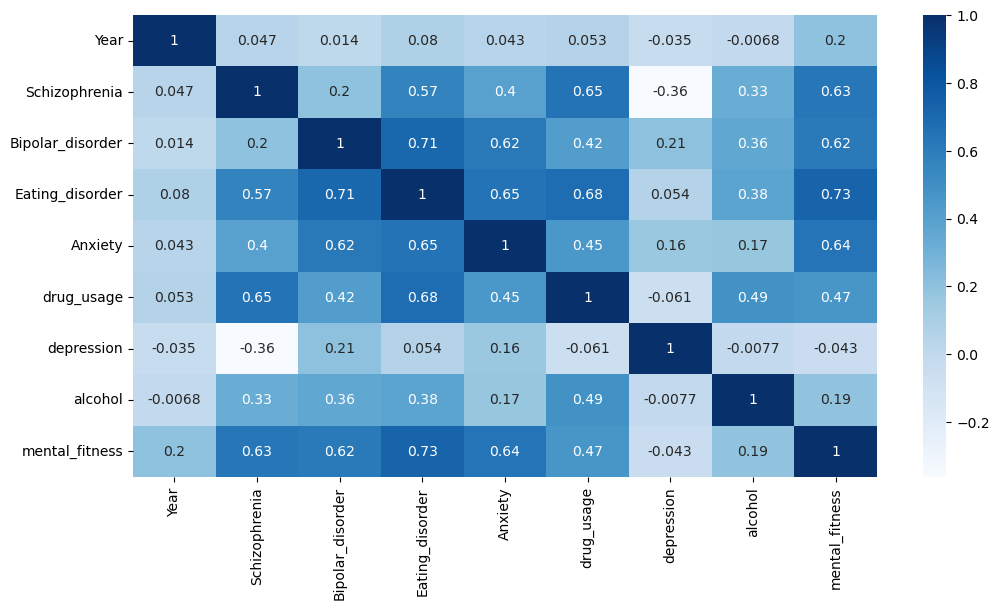

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.plot()
# Creating a heatmap of the correlation matrix for the columns in the DataFrame data

Eating_disorder is positively Correlated to mental_fitness and vice-versa as our eating choice affect our mental health

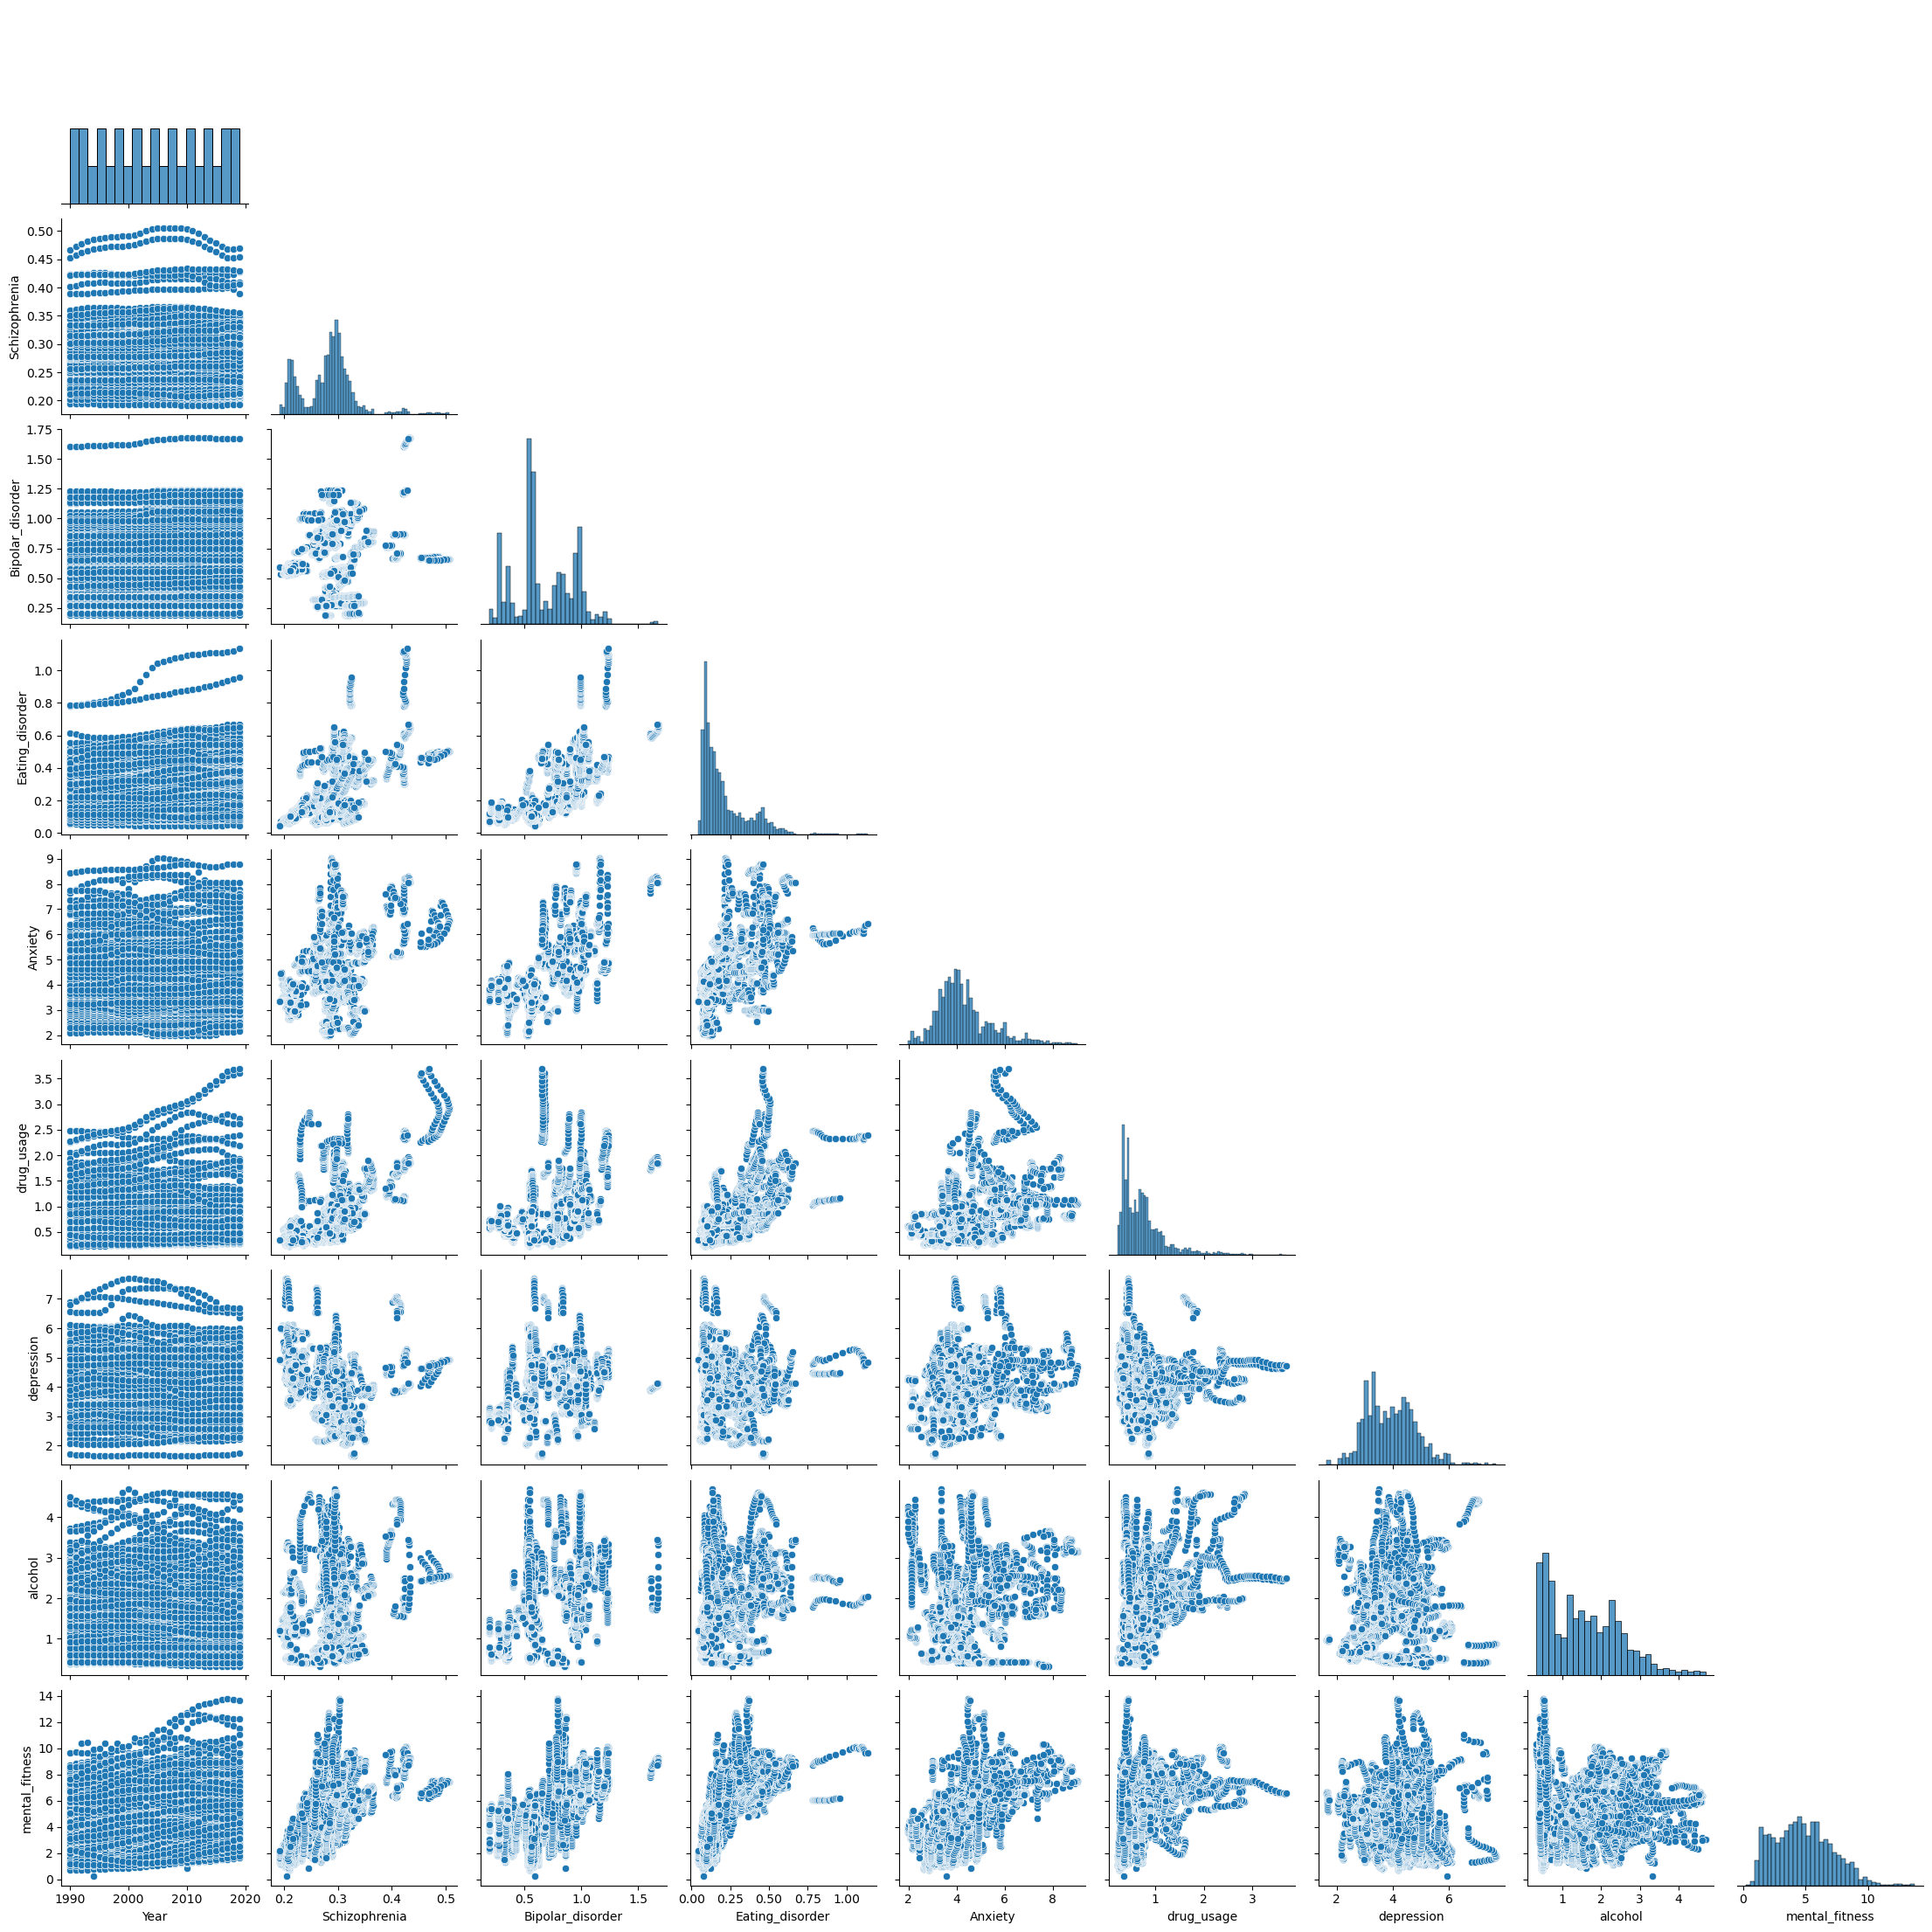

In [15]:
sns.pairplot(data, corner=True)
plt.show()
# Creating a pairwise scatter plot matrix for the columns in the DataFrame data

In [16]:
mean = data['mental_fitness'].mean()
# Calculating the mean value of the 'mental_fitness' column in the DataFrame data
mean
# Displaying the calculated mean value

4.8180618117506135

In [17]:
fig = px.pie(data, values='mental_fitness', names='Year')
fig.show()
# Creating a pie chart to visualize the distribution of mental fitness across different years

# YEARWISE VARIATIONS IN MENTAL FITNESS OF DIFFERENT COUNTRIES

In [18]:
fig = px.line(data, x='Year', y='mental_fitness', color='country', markers=True, color_discrete_sequence=['red', 'blue'], template='plotly_dark')
fig.show()
# Creating a line plot to visualize the trend of mental fitness over time, differentiated by country

In [19]:
fig = px.line(data, x='Year', y='Schizophrenia', color='country', markers=True, color_discrete_sequence=['red', 'blue'], template='plotly_dark')
fig.show()
# Creating a line plot to visualize the trend of schizophrenia prevalence over time, differentiated by country

In [20]:
fig = px.scatter(data, x='Year', y='depression', color='country', size='mental_fitness', hover_data=['Schizophrenia'], template='plotly_dark')
fig.show()
# Creating a scatter plot to visualize the relationship between depression and mental fitness, differentiated by country

In [21]:
fig = px.bar(data, x='country', y='Bipolar_disorder', color='Year', barmode='group', template='plotly_dark')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()
# Creating a grouped bar chart to compare the prevalence of Bipolar Disorder across countries and years

In [22]:
fig = px.box(data, x='Year', y='Eating_disorder', color='country', template='plotly_dark')
fig.show()
# Creating a box plot to visualize the distribution of Eating Disorder prevalence across different years and countries

In [23]:
fig = px.histogram(data, x='Anxiety', color='country', marginal='box', template='plotly_dark')
fig.show()
# Creating a histogram with overlaid box plots to visualize the distribution of Anxiety levels across different countries

In [24]:
fig = px.scatter_matrix(data, dimensions=['depression', 'alcohol', 'drug_usage', 'mental_fitness'], color='country', template='plotly_dark')
fig.show()
# Creating a scatter matrix plot to visualize the relationships between multiple variables (depression, alcohol, drug usage, mental fitness) across different countries

In [25]:
fig = px.scatter(data, x='Year', y='depression', size='mental_fitness', color='country', template='plotly_dark')
fig.show()
# Creating a scatter plot to visualize the relationship between depression, mental fitness, and year, differentiated by country

In [26]:
fig = px.bar(data, x='country', y='Bipolar_disorder', color='Year', barmode='group', template='plotly_dark')
fig.show()
# Creating a grouped bar plot to compare the prevalence of Bipolar Disorder across different countries and years

In [27]:
df= data
df.head(10)

country  Year  Schizophrenia  Bipolar_disorder  Eating_disorder  \
0  Afghanistan  1990       0.228979          0.721207         0.131001   
1  Afghanistan  1991       0.228120          0.719952         0.126395   
2  Afghanistan  1992       0.227328          0.718418         0.121832   
3  Afghanistan  1993       0.226468          0.717452         0.117942   
4  Afghanistan  1994       0.225567          0.717012         0.114547   
5  Afghanistan  1995       0.224713          0.716686         0.111129   
6  Afghanistan  1996       0.223690          0.716388         0.107786   
7  Afghanistan  1997       0.222424          0.716143         0.103931   
8  Afghanistan  1998       0.221129          0.716139         0.100343   
9  Afghanistan  1999       0.220065          0.716323         0.097946   

    Anxiety  drug_usage  depression   alcohol  mental_fitness  
0  4.835127    0.454202    5.125291  0.444036        1.696670  
1  4.821765    0.447112    5.116306  0.444250        1.734281  
2  4.801434    0.441190    5.106558  0.445501        1.791189  
3  4.789363    0.435581    5.100328  0.445958        1.776779  
4  4.784923    0.431822    5.099424  0.445779        1.712986  
5  4.780851    0.428578    5.098495  0.445422        1.738272  
6  4.777272    0.426393    5.100580  0.444837        1.778098  
7  4.775242    0.423720    5.105474  0.443938        1.781815  
8  4.777377    0.422491    5.113707  0.442665        1.729402  
9  4.782067    0.421215    5.120480  0.441428        1.850988

In [28]:
# Display information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [29]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over the columns of the DataFrame
for column in df.columns:
    # Check if the column data type is 'object' (categorical)
    if df[column].dtype == 'object':
        # Use the label encoder to transform the categorical data into numerical labels
        df[column] = label_encoder.fit_transform(df[column])

# Comment: The above code snippet utilizes the LabelEncoder from scikit-learn to encode categorical variables in the DataFrame. It iterates over each column and checks if the data type is 'object', indicating a categorical variable. If so, it applies the label encoder's fit_transform method to convert the categorical values into numerical labels.

In [30]:
# Retrieve the shape of the DataFrame
df_shape = df.shape

# Print the shape of the DataFrame
print(df_shape)

(6840, 10)


# Split Data 


In [31]:
# Splitting the Data into Training and Testing Sets

# In this step, the dataset is split into input features (X) and target variable (y). The target variable, 'mental_fitness', is dropped from the input features to create X, which contains the remaining columns.
# The target variable, 'mental_fitness', is assigned to y.
# The data is then split into training and testing sets using the train_test_split function from the sklearn.model_selection module. The test_size parameter is set to 0.20, indicating that 20% of the data will be used for testing, while 80% will be used for training.
# The random_state parameter is set to 2 to ensure reproducibility of the split.

import sklearn.model_selection as ms

X = df.drop('mental_fitness', axis=1)
y = df['mental_fitness']

xtrain, xtest, ytrain, ytest = ms.train_test_split(X, y, test_size=0.20, random_state=2)

In [32]:
# Training (6840, 10)
# 6840*80/100 = 5472
# 6840*20/100 = 1368
# Training (5472, 10)
# The training data consists of 5,472 samples (80% of the total data) with 10 input features.

# Testing (1368, 10)
# The testing data consists of 1,368 samples (20% of the total data) with 10 input features.

print("xtrain:", xtrain.shape)
print("xtest:", xtest.shape)
print("\nytrain:", ytrain.shape)
print("ytest:", ytest.shape)

# Comment: The code above prints the shape of the training and testing data.
# The training data (xtrain) has a shape of (5472, 10), indicating 5,472 samples and 10 input features.
# The testing data (xtest) has a shape of (1368, 10), indicating 1,368 samples and 10 input features.
# The target variable for training (ytrain) has a shape matching the number of samples in xtrain, and the target variable for testing (ytest) has a shape matching the number of samples in xtest.

# Ensure that the shapes printed match the expected dimensions of your training and testing data.

xtrain: (5472, 9)
xtest: (1368, 9)

ytrain: (5472,)
ytest: (1368,)


# **LINEAR REGRESSION**

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model and fit it to the training data
lr = LinearRegression()
lr.fit(xtrain, ytrain)

# Make predictions on the training data
ytrain_pred = lr.predict(xtrain)

# Calculate Mean Squared Error (MSE) and R-squared score for training data
mse = mean_squared_error(ytrain, ytrain_pred)
r2 = r2_score(ytrain, ytrain_pred)

# Print the performance metrics of the Linear Regression model on the training set
print("Linear Regression model performance on the training set")
print("-------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(np.sqrt(mse)))  # Corrected the variable name to 'mse'
print("R2 Score: {}".format(r2))


 #Float format wit 2 Decimals:
#print("MSE: {:.2f}".format(mse))
#print("RMSE: {:.2f}".format(np.sqrt(mse)))  # Corrected the variable name to 'mse'
#print("R2 Score: {:.2f}".format(r2))

Linear Regression model performance on the training set
-------------------------------------------------------
MSE: 1.389959372405798
RMSE: 1.1789653821914357
R2 Score: 0.7413245790025275


# **RANDOM FOREST REGRESSOR**

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor model and fit it to the training data
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# Make predictions on the training data
ytrain_pred = rf.predict(xtrain)

# Calculate Mean Squared Error (MSE), RMSE, and R-squared score for training data
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytrain, ytrain_pred)

# Print the performance metrics of the Random Forest Regressor model on the training set
print("Random Forest Regressor model performance on the training set")
print("------------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R2 Score: {}".format(r2))

Random Forest Regressor model performance on the training set
------------------------------------------------------------
MSE: 0.005128958186092491
RMSE: 0.07161674515148318
R2 Score: 0.9990454861887297


# RESULTS:-


In [35]:
# Compare the scores of the Linear Regression and Random Forest Regressor models

# Calculate the scores of Linear Regression model
lr_scores = lr.score(xtest, ytest)

# Calculate the scores of Random Forest Regressor model
rf_scores = rf.score(xtest, ytest)

print("Results of Models")
print("---------------------")
print("Linear Regression value: {:.2f}".format(lr_scores))
print("Random Forest Regressor value: {:.2f}".format(rf_scores))

Results of Models
---------------------
Linear Regression value: 0.76
Random Forest Regressor value: 0.99


* The results shows that the Random Forest Regressor model outperformed the Linear Regression model, achieving a higher score of 0.99 compared to 0.76.

* which indicate random forest regressor is better than linear   